In [28]:
import matplotlib.pyplot as plt
import geopandas
import pandas as pd
from uszipcode import SearchEngine
import mpu

In [70]:
# Turn maps into geopandas dataframes
cal_counties = geopandas.read_file('maps/ca_counties/county_ca.geojson')
usa = geopandas.read_file('maps/states/states.geojson')
cal_state = usa[usa['NAME'] == "California"]

In [72]:
# Get the coordinates of each zipcode,
zips = [95060, 95019, 95357, 93245, 95409, 94122, 93727,]

search = SearchEngine()
lats = []
lngs = []
for z in zips:
    coords = search.by_zipcode(z)
    lats.append(coords.lat)
    lngs.append(coords.lng)
    
locations = pd.DataFrame({
    'zipcode':zips,
    'latitude':lats,
    'longitude':lngs,
})

In [73]:
locations.head(3)

,zipcode,latitude,longitude
0,95060,37.04,-122.10
1,95019,36.94,-121.78
2,95357,37.67,-120.89


In [36]:
# Create a Geopandas DataFrame from the list of locations
from geopandas import GeoDataFrame
from geopandas import points_from_xy

df = locations.copy()
lat = df['latitude']
lon = df['longitude']
geo_locs = GeoDataFrame(df, geometry=points_from_xy(lon, lat))

In [37]:
geo_locs

,zipcode,latitude,longitude,geometry
0,95060,37.04,-122.10,POINT (-122.10000 37.04000)
1,95019,36.94,-121.78,POINT (-121.78000 36.94000)
2,95357,37.67,-120.89,POINT (-120.89000 37.67000)
3,93245,36.29,-119.82,POINT (-119.82000 36.29000)
4,95409,38.45,-122.59,POINT (-122.59000 38.45000)
5,94122,37.76,-122.48,POINT (-122.48000 37.76000)
6,93727,36.75,-119.67,POINT (-119.67000 36.75000)


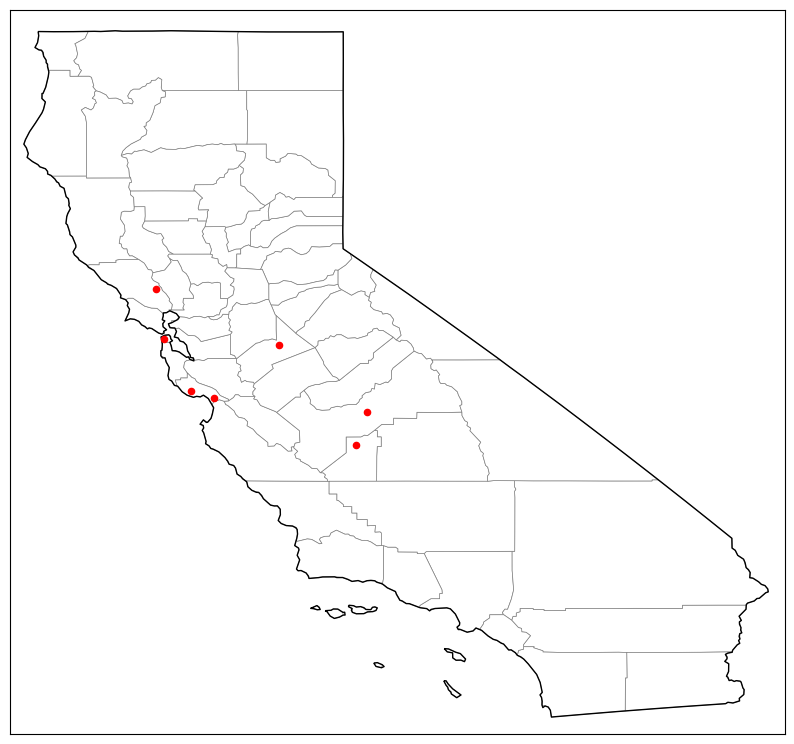

In [69]:
# Plot the map

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
cal_counties.plot(ax=ax, color='white', edgecolor='grey', linewidth=0.5)
cal_state.plot(ax=ax, color='none', edgecolor='black', linewidth=1)

# Plot the zipcode centers
geo_locs['geometry'].plot(ax=ax, color='r', 
            markersize=20, alpha=1)

# Remove ticks and lat/lon labels
ax.tick_params(
    axis='both', bottom=False, left=False,         
    labelbottom=False, labelleft=False) 
# Sets figure limits
ax.set_xlim(-124.6, -113.9);
ax.set_ylim(32.3, 42.3);